In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

import string
import re
from collections import Counter

import nltk
import transformers

# <p style = "background-color:skyblue;font-family:Times New Roman ; font-size: 42px ; text-align:center ; border-radius: 15px 50px"> Importation of data and EDA 📚 </p>

In [2]:
df = pd.read_csv('/kaggle/input/starbucks-reviews-dataset/reviews_data.csv')
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [3]:
df.shape

(850, 6)

There are  633 locations in our dataset


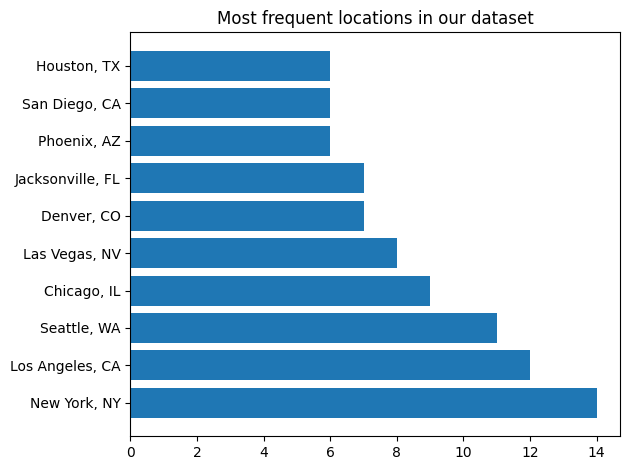

In [4]:
# Locations of the interviewees

print('There are ',len(df.location.unique()),'locations in our dataset')

locations_count =  df.location.value_counts().sort_values(ascending = False) [:10]

# ploting the top 10 locations
plt.barh(locations_count.index ,locations_count.values)
plt.title('Most frequent locations in our dataset')
plt.tight_layout()
plt.show()

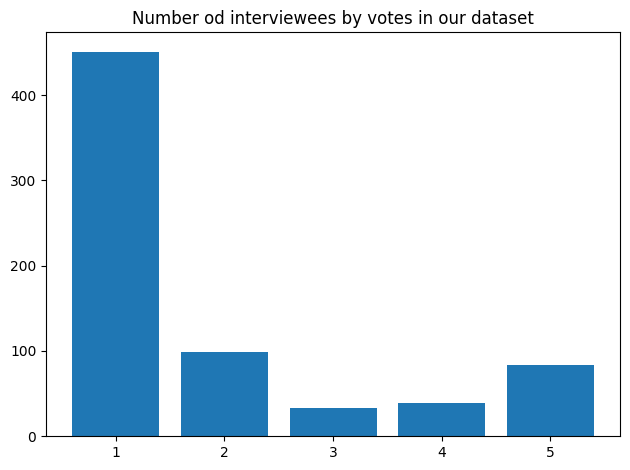

In [5]:
# Rating count

rating_count = df.Rating.value_counts()

# plotting the votes by ratings
plt.bar(rating_count.index ,rating_count.values)
plt.title('Number od interviewees by votes in our dataset')
plt.tight_layout()
plt.show()

In [6]:
# length of the reviews

df['reviews_len'] = df['Review'].progress_apply(lambda text: len(text.split()))
df.head()

  0%|          | 0/850 [00:00<?, ?it/s]

,name,location,Date,Rating,Review,Image_Links,reviews_len
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],60
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],105
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,72
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],86
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,74


In [7]:
# Distribution of the number of words

density = df['reviews_len'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x = density.index ,
                         y = density.values ,
                         fill = 'tozeroy'))
fig.update_layout(title_text = 'Distribution of number of words')
fig.show()

The text seems to be even distributed between  4  and 219. But there seems to be a strange peak at 3 words , let's expect it

In [8]:
df[df['reviews_len'] ==  3]

,name,location,Date,Rating,Review,Image_Links,reviews_len
62,Sharon,"Culpeper, VA","Reviewed July 18, 2022",2.0,No Review Text,['No Images'],3
100,Donald,"Orlando, FL","Reviewed Nov. 22, 2021",1.0,No Review Text,['No Images'],3
793,Maureen,"Lakewood, WA","Reviewed March 25, 2009",NaN,No Review Text,['No Images'],3
794,Maryellen,"Richmond, TX","Reviewed March 23, 2009",NaN,No Review Text,['No Images'],3
795,Ben,"Shanghai, OTHER","Reviewed March 23, 2009",NaN,No Review Text,['No Images'],3
796,Carla,"Cambridge, MA","Reviewed March 15, 2009",NaN,No Review Text,['No Images'],3
797,Michelle,"Yorktown, VA","Reviewed March 14, 2009",NaN,No Review Text,['No Images'],3
798,Katie,"Escondido, CA","Reviewed March 4, 2009",NaN,No Review Text,['No Images'],3
799,Barry,"Okemos, MI","Reviewed Feb. 26, 2009",NaN,No Review Text,['No Images'],3
800,Lori,"Chicago, IL","Reviewed Feb. 23, 2009",NaN,No Review Text,['No Images'],3


In [9]:
# Droping the interviewees without text
df = df[df['reviews_len'] > 3]
df.shape

(813, 7)

In [10]:
# Most common words in the dataset before cleaning
all_words_list  = df['Review'].str.split().sum()
count = Counter( all_words_list ) 
word_dict = dict( sorted(count.items() , key = lambda k:k[1] , reverse = True) ) 

In [11]:
fig  = px.bar(x = list(word_dict.keys())[:20] ,
              y = list(word_dict.values())[:20] ,
              color = list(word_dict.values())[:20])

fig.update_layout(title_text= 'Top 20 most common words in our dataset (before preprocessing)' , xaxis = dict(title = 'Words'), yaxis = dict(title = 'Count') , showlegend=False)
fig.show()

# <p style = "background-color:skyblue;font-family:Times New Roman ; font-size: 42px ; text-align:center ; border-radius: 15px 50px"> Preprocessing  🧹</p>

In [12]:
# Let's clean the data

from nltk.corpus import stopwords
from nltk import SnowballStemmer
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()


In [13]:
nltk.download('all')
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /usr/share/nltk_data...
[nltk_data]    | Downloading pa

In [14]:
text = ' '.join(df['Review'])

In [15]:
# Quels sont les caractères non alpha numériques dans le dataset
Counter(re.findall('[^a-zA-Z]+',text) )

Counter({' ': 64341,
         '. ': 4043,
         ', ': 2160,
         "'": 840,
         '! ': 220,
         '.  ': 183,
         '’': 161,
         ' (': 159,
         ' "': 131,
         '-': 130,
         '? ': 114,
         ') ': 82,
         '" ': 71,
         '... ': 71,
         ' - ': 70,
         ' 2 ': 67,
         ', "': 65,
         '." ': 62,
         '). ': 53,
         ' 3 ': 52,
         ' 5 ': 48,
         ' & ': 42,
         ' ** ': 34,
         '; ': 33,
         '/': 32,
         '!!! ': 31,
         '". ': 31,
         '.': 30,
         ' 4 ': 28,
         "' ": 27,
         ' 10 ': 26,
         '), ': 24,
         ' 20 ': 24,
         ' 6 ': 23,
         '...': 21,
         ' “': 20,
         '!! ': 19,
         ' 1 ': 16,
         ' 15 ': 15,
         ': ': 15,
         '.” ': 14,
         '. ** ': 13,
         ' 30 ': 13,
         ' **. ': 13,
         '.   ': 12,
         '??? ': 11,
         " '": 11,
         ' 7 ': 10,
         '.. ': 10,
         '?" ': 9

We see that there is an @ among the special characters . let's see if  there are emails in the dataset

In [16]:
re.findall('\w@',text) # It didn't seems to be an email

[]

In [17]:
def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]+', ' ',text)
    text = re.sub('[%s]'%re.escape(string.punctuation) ,' ',text)
    text =  ' '.join(lemmatizer.lemmatize(stemmer.stem(word)) for word in text.split(' ') if word not in stop_words)
    return text

In [18]:
df['clean_review'] = df['Review'].progress_apply(clean_text)
df.head()

  0%|          | 0/813 [00:00<?, ?it/s]

,name,location,Date,Rating,Review,Image_Links,reviews_len,clean_review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],60,amber ladonna starbuck southwest parkway alway...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],105,starbuck fire station altamont spring fl made...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,72,want go way recogn starbuck employe billi fran...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],86,friend starbuck card work thank worker paid dr...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,74,kick drink cup warm water work instacart right...


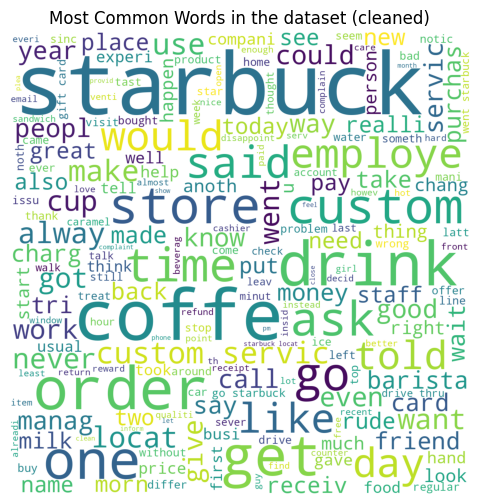

In [19]:
from wordcloud import WordCloud
from PIL import Image

coffee = np.array(Image.open('/kaggle/input/coffee-image/animation-1297198_1280.png'))
wc = WordCloud(mask = coffee,
              max_words = 200,
              background_color = 'white',
              stopwords =  'english').generate(' '.join(df['clean_review']))

plt.figure(figsize = (16,6))
plt.imshow(wc)
plt.axis('off')
plt.title('Most Common Words in the dataset (cleaned)')
plt.show()

In [20]:
all_words_list  = df['clean_review'].str.split().sum()
count = Counter( all_words_list ) 
word_dict = dict( sorted(count.items() , key = lambda k:k[1] , reverse = True) ) 

fig  = px.bar(x = list(word_dict.keys())[:20] ,
              y = list(word_dict.values())[:20] ,
              color = list(word_dict.values())[:20])

fig.update_layout(title_text= 'Top 20 most common words in our dataset (after preprocessing)' , xaxis = dict(title = 'Words'), yaxis = dict(title = 'Count') , showlegend=False)
fig.show()

# <p style = "background-color:skyblue;font-family:Times New Roman ; font-size: 42px ; text-align:center ; border-radius: 15px 50px"> Sentiment Analysis 😊😢 </p>

## <p style = "background-color:skyblue;font-family:Times New Roman ; font-size: 30px ; text-align:center ; border-radius: 15px 50px"> Vader Sentiment Analysis </p>

In [21]:
# Importing the Vader sentiment analyzer
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [22]:
# test
sia.polarity_scores('I am doing good')

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

In [23]:
# Applying the vader SA on all the dataset

res = {}
for i,row in tqdm(df.iterrows() , total = len(df)):
    text = row['clean_review']
    myname = row['name']
    res[myname] = sia.polarity_scores(text)
    

  0%|          | 0/813 [00:00<?, ?it/s]

In [24]:
#Stocking the results in a dataframe
vader_df = pd.DataFrame(res).T
vader_df.head()

,neg,neu,pos,compound
Helen,0.000,0.723,0.277,0.8020
Courtney,0.084,0.558,0.358,0.9643
Daynelle,0.146,0.596,0.258,0.4767
Taylor,0.100,0.433,0.467,0.9552
Tenessa,0.000,0.616,0.384,0.9565


In [25]:
df = df.merge(vader_df.reset_index(names = 'name')  , how = 'left')
df.head()

,name,location,Date,Rating,Review,Image_Links,reviews_len,clean_review,neg,neu,pos,compound
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],60,amber ladonna starbuck southwest parkway alway...,0.000,0.723,0.277,0.8020
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],105,starbuck fire station altamont spring fl made...,0.084,0.558,0.358,0.9643
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,72,want go way recogn starbuck employe billi fran...,0.146,0.596,0.258,0.4767
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],86,friend starbuck card work thank worker paid dr...,0.100,0.433,0.467,0.9552
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,74,kick drink cup warm water work instacart right...,0.000,0.616,0.384,0.9565


In [26]:
import seaborn as sns

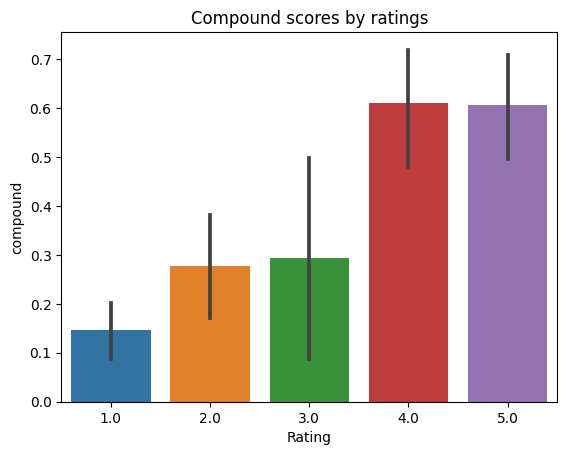

In [27]:
## Analyzing of the scores

# Representing the compound score by ratings

sns.barplot(data = df ,x = 'Rating' , y = 'compound')
plt.title('Compound scores by ratings')
plt.show()

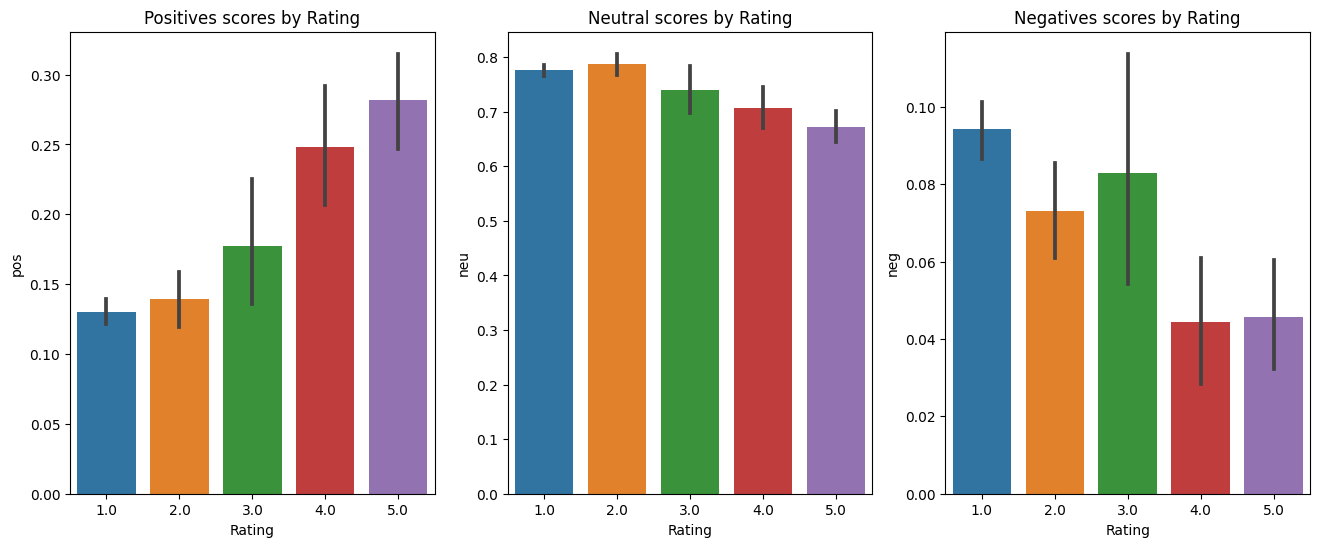

In [28]:
# Positive , Neutral and Negative score by Rating

fig , axs = plt.subplots(1,3,figsize = (16,6))
sns.barplot(data = df ,x = 'Rating' , y = 'pos' , ax = axs[0])
axs[0].set_title('Positives scores by Rating')
sns.barplot(data = df ,x = 'Rating' , y = 'neu' , ax = axs[1])
axs[1].set_title('Neutral scores by Rating')
sns.barplot(data = df ,x = 'Rating' , y = 'neg', ax = axs[2])
axs[2].set_title('Negatives scores by Rating')
plt.show()

## <p style = "background-color:skyblue;font-family:Times New Roman ; font-size: 30px ; text-align:center ; border-radius: 15px 50px"> BERT sentiment analysis </p>

In [29]:
# Let's import the important libraries for sentiment analysis with BERT

from transformers import AutoModelForSequenceClassification , pipeline , AutoTokenizer
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [30]:
# Test

example = 'The coffee was not good , i wasted my time wating here'

encoded_text = tokenizer(example , return_tensors = 'pt')
result = model(**encoded_text)

scores = result[0][0].detach().numpy()
scores = softmax(scores)

scores_dict = { 'neg': scores[0],
                'neu': scores[1],
               'pos': scores[2] ,
               'label': np.argmax(scores)
    
}


In [31]:
scores_dict

{'neg': 0.9475561, 'neu': 0.04689925, 'pos': 0.0055445996, 'label': 0}

In [32]:
# Define the polarity score function

def polarity_scores_bert(text):
    encoded_text = tokenizer(text , return_tensors = 'pt')
    result = model(**encoded_text)

    scores = result[0][0].detach().numpy()
    scores = softmax(scores)

    scores_dict = { 'roberta_neg': scores[0],
                    'roberta_neu': scores[1],
                   'roberta_pos': scores[2],
                  'label': np.argmax(scores)}
    
    
    return scores_dict

In [33]:
# Applying the Bert SA on all the dataset

res = {}
for i,row in tqdm(df.iterrows() , total = len(df)):
    text = row['clean_review']
    myname = row['name']
    res[myname] = polarity_scores_bert(text)
    

  0%|          | 0/813 [00:00<?, ?it/s]

In [34]:
#Stocking the results in a dataframe
bert_df = pd.DataFrame(res).T
bert_df.head()

# Merging it with our dataframe

df = df.merge(bert_df.reset_index(names = 'name')  , how = 'left')
df.head()

,name,location,Date,Rating,Review,Image_Links,reviews_len,clean_review,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,label
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],60,amber ladonna starbuck southwest parkway alway...,0.000,0.723,0.277,0.8020,0.005974,0.139321,0.854705,2.0
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],105,starbuck fire station altamont spring fl made...,0.084,0.558,0.358,0.9643,0.030289,0.191003,0.778707,2.0
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,72,want go way recogn starbuck employe billi fran...,0.146,0.596,0.258,0.4767,0.775348,0.179139,0.045514,0.0
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],86,friend starbuck card work thank worker paid dr...,0.100,0.433,0.467,0.9552,0.010401,0.065106,0.924493,2.0
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,74,kick drink cup warm water work instacart right...,0.000,0.616,0.384,0.9565,0.005024,0.066112,0.928864,2.0


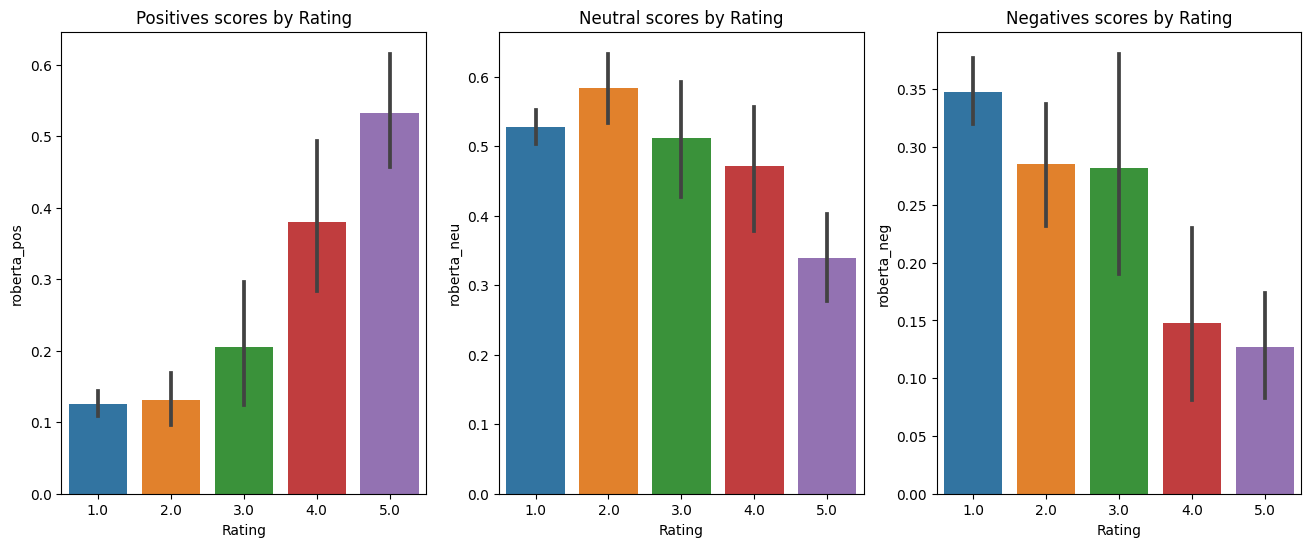

In [35]:
# Visualizing the results of Roberta VA

# Positive , Neutral and Negative score by Rating

fig , axs = plt.subplots(1,3,figsize = (16,6))
sns.barplot(data = df ,x = 'Rating' , y = 'roberta_pos' , ax = axs[0])
axs[0].set_title('Positives scores by Rating')
sns.barplot(data = df ,x = 'Rating' , y = 'roberta_neu' , ax = axs[1])
axs[1].set_title('Neutral scores by Rating')
sns.barplot(data = df ,x = 'Rating' , y = 'roberta_neg', ax = axs[2])
axs[2].set_title('Negatives scores by Rating')
plt.show()

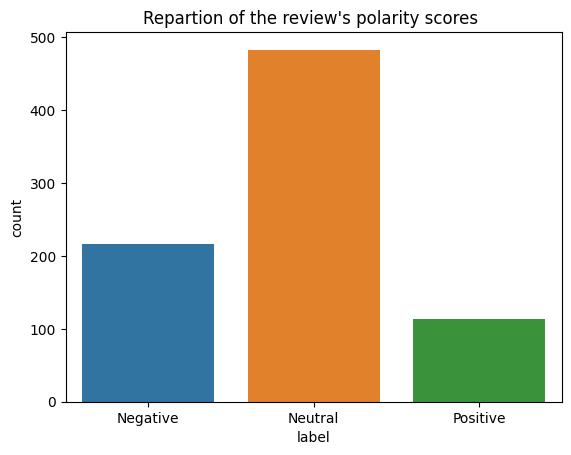

In [36]:
# Labels

sns.countplot(data = df  ,x = 'label')
plt.xticks( ticks =  df.label.sort_values().unique() ,labels = ['Negative','Neutral','Positive'])
plt.title("Repartion of the review's polarity scores ")
plt.show()

## <p style = "background-color:skyblue;font-family:Times New Roman ; font-size: 42px ; text-align:center ; border-radius: 15px 50px"> Exploring the results 📊 </p>

In [37]:
location_df = df.drop(['name','Image_Links','Review','clean_review','Date','Rating'],axis=1).groupby('location').mean()
location_df = location_df.loc[df.location.value_counts()[:20].index] # keeping the 20 most frequent locations

In [38]:
# Reviews length by location

fig = px.bar(x = location_df.reviews_len.sort_values(ascending= False).index, 
             y = location_df.reviews_len.sort_values(ascending= False) , 
            color = location_df.reviews_len.sort_values(ascending= False).index ) 
fig.update_layout(title_text = 'Reviews lenght for the 20 Most frequent locations in our dataframe')
fig.show()

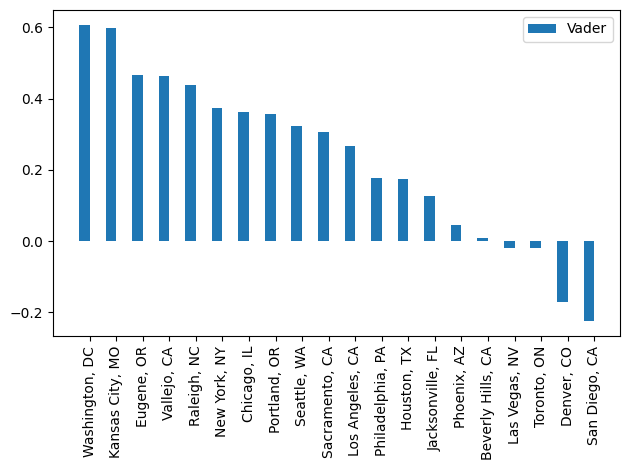

In [39]:
# Compound scores by Location

locations = location_df.compound.sort_values(ascending= False).index
X = np.arange(len(locations))

plt.bar( X - 0.2 , location_df.compound.sort_values(ascending= False),0.4)
plt.xticks( X , locations ,rotation = 90)
plt.legend(['Vader'])
plt.tight_layout()
plt.show()

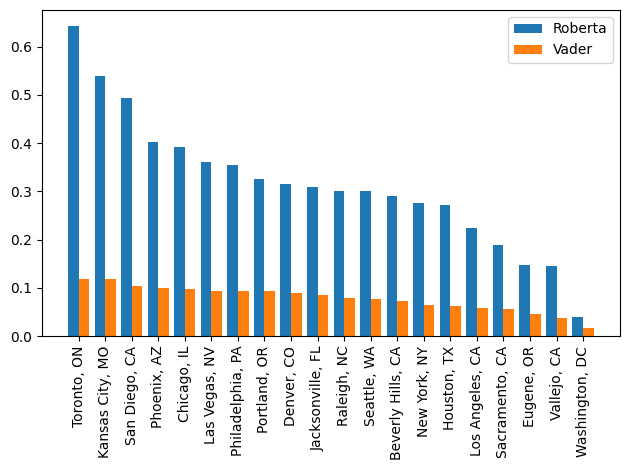

In [40]:
# Negative Sentiment by location

locations = location_df.roberta_neg.sort_values(ascending= False).index
X = np.arange(len(locations))

plt.bar( X - 0.2 , location_df.roberta_neg.sort_values(ascending= False),0.4)
plt.bar(X + 0.2 , location_df.neg.sort_values(ascending= False),0.4)
plt.xticks( X , locations ,rotation = 90)
plt.legend(['Roberta','Vader'])
plt.tight_layout()
plt.show()

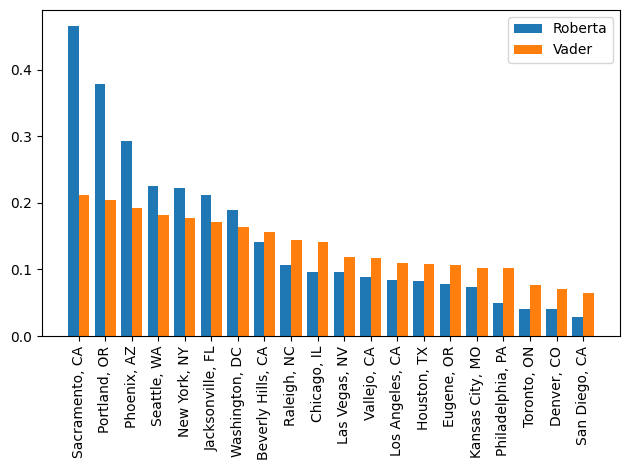

In [41]:
# Positive Sentiment by location

locations = location_df.roberta_pos.sort_values(ascending= False).index
X = np.arange(len(locations))

plt.bar( X - 0.2 , location_df.roberta_pos.sort_values(ascending= False),0.4)
plt.bar(X + 0.2 , location_df.pos.sort_values(ascending= False),0.4)
plt.xticks( X , locations ,rotation = 90)
plt.legend(['Roberta','Vader'])
plt.tight_layout()
plt.show()

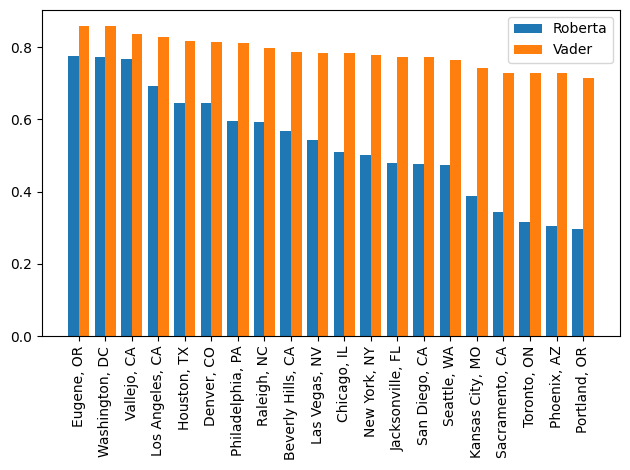

In [42]:
# Neutral Sentiment by location

locations = location_df.roberta_neu.sort_values(ascending= False).index
X = np.arange(len(locations))

plt.bar( X - 0.2 , location_df.roberta_neu.sort_values(ascending= False),0.4)
plt.bar(X + 0.2 , location_df.neu.sort_values(ascending= False),0.4)
plt.xticks( X , locations ,rotation = 90)
plt.legend(['Roberta','Vader'])
plt.tight_layout()
plt.show()

In [43]:
#  Let's look at some examples where the rating and the score differ the most

# positive sentiment but 1 star review (vader)
df.query('Rating == 1').sort_values('pos' , ascending = False)['Review'].values[0]

"I have been a loyal customer for 10+ yrs...however, I've won multiple prizes on the most recent Starbucks app game but the prizes don't get delivered to my account. Customer service didn't know how to help. I've spent money to play the game trying to win prizes but never see the prizes that I've already won. FRAUD!!! Don't fall for it screenshots don't help either. It needs the reward to be displayed as in barcode scan. I'm not spending in Starbucks anymore. Its brand of integrity is very poor."

In [44]:
# positive sentiment but 1 star review (roberta)
df.query('Rating == 1').sort_values('roberta_pos' , ascending = False)['Review'].values[0]

'I spend about $30/day, is it asking too much to have a lid that does not fall off? I have contacted Starbucks customer service for months being told they are addressing the issue but nothing changes.'

In [45]:
# negative sentiment but 5 stars review (vader)
df.query('Rating == 5').sort_values('neg' , ascending = False)['Review'].values[0]

'I wish their menu had more selections. Also some of the staff need to listen to their customers! I truly enjoy the chi tea and a few of the other things on the menu.'

In [46]:
# negative sentiment but 5 stars review (roberta)
df.query('Rating == 5').sort_values('roberta_neg' , ascending = False)['Review'].values[0]

"The Starbucks in Lakewood is nice and cozy but I like to see more tables than those lower chairs and small tables. It makes hard for people to sit down who are seniors like me. Also I this the coffee should be free on refills. Ruth is such a nice and friendly person. She even remembers your name. I think Starbucks is a good place to come to. The music isn't loud and you can hear yourself talk. Thank you Starbucks for making my day better. Service is good but bit pricing."

# Conclusion

In this notebook our goal was to perform a sentiment analysis on the starbucks customer reviews database to know what our customers think about our services .

Key takeaways are :

* Even though there are overall  more  neutral reviews in our dataset , there are more négatives reviews than positives ones in our dataset

* The cities where the reviews are the most positive are Sacramento , Portland and Phoenix

* The cities where the review are the most negatives are Torronto , Kansas and San Diego